## Introdución

El Deep Learning es un campo de la inteligencia artificial enfocado en crear modelos basados en redes neuronales que permiten aprender representaciones no lineales de manera jerárquica. Las redes neuronales recurrentes (RNN) son un tipo de arquitectura de deep learning diseñada para trabajar con datos secuenciales, donde la información se propaga a través de conexiones recurrentes, permitiendo a la red aprender dependencias temporales.

Se describe cómo entrenar modelos de redes neuronales recurrentes -específicamente RNN y LSTM- para la predicción de series temporales (forecasting) empleando Python, Keras y Skforecast.

**Keras3** proporciona una interfaz sencilla para construir y entrenar modelos de redes neuronales. Gracias a su API de alto nivel, los desarrolladores pueden implementar fácilmente arquitecturas LSTM, aprovechando las ventajas de la eficiencia computacional y la escalabilidad que ofrece el deep learning.

**Skforecast** permite generalizar de forma sencilla la implementación y uso de modelos de machine learning -entre ellos LSTMs y RNNs- a problemas de forecasting. De esta forma, el usuario puede definir el problema y abstraerse de la arquitectura. Para usuarios avanzados, skforecast también permite ejecutar una arquitectura de deep learning previamente definida.

## Redes Neuronales Recurrentes (RNN)

Las Redes Neuronales Recurrentes (RNN) son un tipo de redes neuronales diseñadas para procesar datos que siguen un orden secuencial. En las redes neuronales convencionales, como las redes feedforward, la información fluye en una dirección, desde la entrada hasta la salida pasando por las capas ocultas, sin considerar la estructura secuencial de los datos. En cambio, las RNN mantienen estados internos o memorias, lo que les permite recordar información pasada y utilizarla para predecir datos futuros en la secuencia.

La unidad básica de una RNN es la célula recurrente. Esta célula toma dos entradas: la entrada actual y el estado oculto previo. El estado oculto puede entenderse como una "memoria" que retiene información de las iteraciones previas. La entrada actual y el estado oculto anterior se combinan para calcular la salida actual y el nuevo estado oculto. Esta salida se utiliza como entrada para la próxima iteración, junto con la siguiente entrada en la secuencia de datos.

A pesar de los avances que se han conseguido con las arquitecturas RNN, tienen limitaciones para capturar patrones a largo plazo. Es por esto que se han desarrollado variantes como las LSTM (Memorias a Corto y Largo Plazo) y las GRU (Unidades Recurrentes Gated), que abordan estos problemas y permiten retener información a largo plazo de manera más efectiva.

![](https://cienciadedatos.net/images/schema-rnn-model.jpg)

Diagrama de una red RNN simple. Fuente: James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (1st ed.) [PDF]. Springer.

### Long Short-Term Memory (LSTM)

Las redes neuronales Long Short-Term Memory (LSTM) constituyen un tipo especializado de RNNs diseñadas para superar las limitaciones asociados con la captura de dependencias temporales a largo plazo. A diferencia de las RNN tradicionales, las LSTMs incorporan una arquitectura más compleja, introduciendo unidades de memoria y mecanismos de puertas para mejorar la gestión de la información a lo largo del tiempo.

Estructura de las LSTMs

Las LSTMs presentan una estructura modular que consta de tres puertas (gates) fundamentales: la puerta de olvido (forget gate), la puerta de entrada (input gate), y la puerta de salida (output gate). Estas puertas trabajan en conjunto para regular el flujo de información a través de la unidad de memoria, permitiendo un control más preciso sobre qué información retener y cuál olvidar.

Puerta de Olvido (Forget Gate): Regula cuánta información se debe olvidar y cuánta se mantiene, combinando la entrada actual y la salida anterior mediante una función sigmoide.

Puerta de Entrada (Input Gate): Decide cuánta nueva información debe añadirse a la memoria a largo plazo.

Puerta de Salida (Output Gate): Determina cuánta información de la memoria actual se utilizará para la salida final, combinando la entrada actual y la información de la memoria mediante una función sigmoide.

![](https://databasecamp.de/wp-content/uploads/lstm-architecture-1024x709.png)


Diagrama de la entradas y dalidas de una LSTM. Fuente: codificandobits https://databasecamp.de/wp-content/uploads/lstm-architecture-1024x709.png.

https://cienciadedatos.net/documentos/py35-redes-neuronales-python

## Tipos de problemas en el modelado de series temporales

La complejidad de un problema de series temporarles suele estar definida por tres factores clave: primero, decidir qué serie o series temporales utilizar para entrenar el modelo; segundo, determinar qué o cuántas series temporales se quieren predecir; y tercero, definir el número de pasos a futuro que se desea predecir. Estos tres aspectos pueden ser un verdadero desafío al abordar problemas de series temporales.

Las redes neuronales recurrentes, gracias a su ámplia variedad de arquitecturas, permiten modelar los siguientes escenarios:

**Problemas 1:1** - Modelar una única serie y predecir esa misma serie (single-serie, single-output)

Descripción: Este tipo de problemas implica modelar una serie temporal utilizando únicamente su pasado. Es un problema típico autoregresivo.
Ejemplo: Predicción de la temperatura diaria en base a la temperatura de los últimos días.

**Problemas N:1** - Modelar una única serie utilizando múltiples series (multi-series, single-output)

Descripción: Se trata de problemas en los que se utilizan varias series temporales para predecir una única serie. Cada serie puede representar una entidad o variable diferente, pero la variable salida es solo una de las series.
Ejemplo: Predicción de la temperatura diaria en base a múltiples series como: temperatura, humedad y presión atmosférica.

**Problemas N:M** - Modelar múltiples series utilizando múltiples series (multi-series, multiple-outputs)

Descripción: Estos problemas consisten en modelar y predecir valores futuros de varias series temporales al mismo tiempo.
Ejemplo: Pronosticar los valores en bolsa de varias acciones en función del histórico de la bolsa, del precio de la energía y materias primas.

En todos estos encenarios, la predicción puede realizarse single-step forecasting (un paso a futuro) o multi-step forecasting (múltiples pasos a futuro). En el primer caso, el modelo solo predice un único valor, mientras que en el segundo, el modelo predice múltiples valores a futuro.

En algunas situaciones, puede resultar complicado definir y crear la arquitectura de Deep Learning adecuada para abordar un problema concreto. La librería skforecast dispone de funcionalidades que permiten determinar la arquitectura de Tensorflow adecuada para cada problema, simplificando y acelerando el proceso de modelado para una amplia variedad de problemas. A continuación, se muestra un ejemplo de cómo utilizar skforecast para resolver cada uno de los problemas de series temporales descritos, utilizando redes neuronales recurrentes.

## Datos

Los datos empleados contienen información detallada sobre la calidad del aire en la ciudad de Valencia (España). La colección de datos abarca desde el 1 de enero de 2019 hasta el 31 de diciembre de 2023, proporcionando mediciones horarias de diversos contaminantes atmosféricos, como partículas PM2.5 y PM10, monóxido de carbono (CO), dióxido de nitrógeno (NO2), entre otros. Los datos se han obtenido de plataforma Red de Vigilancia y Control de la Contaminación Atmosférica, 46250054-València - Centre, https://mediambient.gva.es/es/web/calidad-ambiental/datos-historicos.

In [1]:
#%pip install skforecast

In [2]:
# Procesado de datos
# ==============================================================================
import os
import pandas as pd
import numpy as np
from skforecast.datasets import fetch_dataset

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from skforecast.plot import set_dark_theme
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff
pio.templates.default = "seaborn"
poff.init_notebook_mode(connected=True)

# Keras
# ==============================================================================
os.environ["KERAS_BACKEND"] = "tensorflow" # 'tensorflow', 'jax´ or 'torch'
import keras
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.callbacks import EarlyStopping

if keras.__version__ > "3.0":
    if keras.backend.backend() == "tensorflow":
        import tensorflow
    elif keras.backend.backend() == "torch":
        import torch
    else:
        print("Backend not recognized. Please use 'tensorflow' or 'torch'.")

# Modelado 
# ==============================================================================
import skforecast
from skforecast.deep_learning import ForecasterRnn
from skforecast.deep_learning.utils import create_and_compile_model
from sklearn.preprocessing import MinMaxScaler
from skforecast.model_selection import TimeSeriesFold
from skforecast.model_selection import backtesting_forecaster_multiseries

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

color = '\033[1m\033[38;5;208m' 
print(f"{color}Version skforecast: {skforecast.__version__}")
print(f"{color}Version Keras: {keras.__version__}")
print(f"{color}Using backend: {keras.backend.backend()}")
print(f"{color}Version pandas: {pd.__version__}")
print(f"{color}Version numpy: {np.__version__}")
if keras.__version__ > "3.0":
    if keras.backend.backend() == "tensorflow":
        print(f"{color}Version tensorflow: {tensorflow.__version__}")
    elif keras.backend.backend() == "torch":
        print(f"{color}Version torch: {torch.__version__}")
    else:
        print(f"{color}Version torch: {jax.__version__}")


Version skforecast: 0.14.0
Version Keras: 3.6.0
Using backend: tensorflow
Version pandas: 2.2.2
Version numpy: 1.26.4
Version tensorflow: 2.18.0


In [3]:
# Descarga y procesado de datos
# ==============================================================================
air_quality = fetch_dataset(name="air_quality_valencia_no_missing")
air_quality.head()

air_quality_valencia_no_missing
-------------------------------
Hourly measures of several air chemical pollutant at Valencia city (Avd.
Francia) from 2019-01-01 to 20213-12-31. Including the following variables:
pm2.5 (µg/m³), CO (mg/m³), NO (µg/m³), NO2 (µg/m³), PM10 (µg/m³), NOx (µg/m³),
O3 (µg/m³), Veloc. (m/s), Direc. (degrees), SO2 (µg/m³). Missing values have
been imputed using linear interpolation.
Red de Vigilancia y Control de la Contaminación Atmosférica, 46250047-València -
Av. França, https://mediambient.gva.es/es/web/calidad-ambiental/datos-
historicos.
Shape of the dataset: (43824, 10)


,so2,co,no,no2,pm10,nox,o3,veloc.,direc.,pm2.5
datetime,,,,,,,,,,
2019-01-01 00:00:00,8.0,0.2,3.0,36.0,22.0,40.0,16.0,0.5,262.0,19.0
2019-01-01 01:00:00,8.0,0.1,2.0,40.0,32.0,44.0,6.0,0.6,248.0,26.0
2019-01-01 02:00:00,8.0,0.1,11.0,42.0,36.0,58.0,3.0,0.3,224.0,31.0
2019-01-01 03:00:00,10.0,0.1,15.0,41.0,35.0,63.0,3.0,0.2,220.0,30.0
2019-01-01 04:00:00,11.0,0.1,16.0,39.0,36.0,63.0,3.0,0.4,221.0,30.0


In [4]:
air_quality.tail()

,so2,co,no,no2,pm10,nox,o3,veloc.,direc.,pm2.5
datetime,,,,,,,,,,
2023-12-31 19:00:00,3.0,0.1,6.0,18.0,8.0,26.0,47.0,1.7,246.0,7.0
2023-12-31 20:00:00,3.0,0.1,6.0,19.0,7.0,27.0,49.0,1.3,239.0,6.0
2023-12-31 21:00:00,3.0,0.1,4.0,15.0,5.0,22.0,55.0,1.5,247.0,4.0
2023-12-31 22:00:00,3.0,0.1,5.0,13.0,5.0,20.0,57.0,1.1,246.0,5.0
2023-12-31 23:00:00,3.0,0.1,5.0,12.0,5.0,20.0,55.0,0.5,247.0,4.0


In [5]:
# Comprobación de índice y frecuencia
# ==============================================================================
print(f"Tipo de índice: {air_quality.index.dtype}")
print(f"Frecuencia: {air_quality.index.freq}")

Tipo de índice: datetime64[ns]
Frecuencia: <Hour>


Para facilitar el entrenamiento de los modelos, la búsqueda de hiperparámetros óptimos y la evaluación de su capacidad predictiva, los datos se dividen en tres conjuntos separados: entrenamiento, validación y test.

In [6]:
air_quality

,so2,co,no,no2,pm10,nox,o3,veloc.,direc.,pm2.5
datetime,,,,,,,,,,
2019-01-01 00:00:00,8.0,0.2,3.0,36.0,22.0,40.0,16.0,0.5,262.0,19.0
2019-01-01 01:00:00,8.0,0.1,2.0,40.0,32.0,44.0,6.0,0.6,248.0,26.0
2019-01-01 02:00:00,8.0,0.1,11.0,42.0,36.0,58.0,3.0,0.3,224.0,31.0
2019-01-01 03:00:00,10.0,0.1,15.0,41.0,35.0,63.0,3.0,0.2,220.0,30.0
2019-01-01 04:00:00,11.0,0.1,16.0,39.0,36.0,63.0,3.0,0.4,221.0,30.0
...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,3.0,0.1,6.0,18.0,8.0,26.0,47.0,1.7,246.0,7.0
2023-12-31 20:00:00,3.0,0.1,6.0,19.0,7.0,27.0,49.0,1.3,239.0,6.0
2023-12-31 21:00:00,3.0,0.1,4.0,15.0,5.0,22.0,55.0,1.5,247.0,4.0


In [7]:
# Split train-validation-test
# ==============================================================================
air_quality = air_quality.loc[:'2023-12-31 23:00:00', :].copy()
end_train = '2023-03-30 23:00:00'
end_validation = '2023-09-30 23:00:00'
air_quality_train = air_quality.loc[:end_train, :].copy()
air_quality_val = air_quality.loc[end_train:end_validation, :].copy()
air_quality_test = air_quality.loc[end_validation:, :].copy()

print(
    f"Fechas train      : {air_quality_train.index.min()} --- " 
    f"{air_quality_train.index.max()}  (n={len(air_quality_train)})"
)
print(
    f"Fechas validation : {air_quality_val.index.min()} --- " 
    f"{air_quality_val.index.max()}  (n={len(air_quality_val)})"
)
print(
    f"Fechas test       : {air_quality_test.index.min()} --- " 
    f"{air_quality_test.index.max()}  (n={len(air_quality_test)})"
)

Fechas train      : 2019-01-01 00:00:00 --- 2023-03-30 23:00:00  (n=37200)
Fechas validation : 2023-03-30 23:00:00 --- 2023-09-30 23:00:00  (n=4417)
Fechas test       : 2023-09-30 23:00:00 --- 2023-12-31 23:00:00  (n=2209)


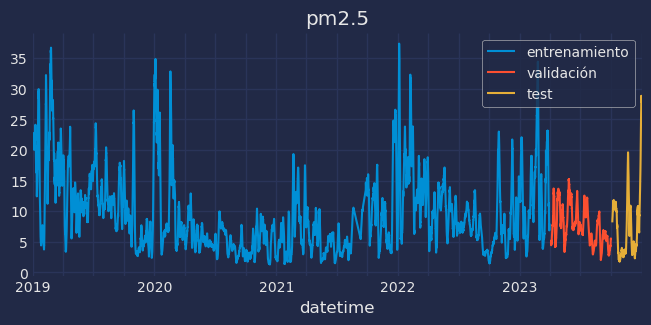

In [8]:
# Gráfico de la serie temporal del contaminante pm2.5
# ==============================================================================
set_dark_theme()
fig, ax = plt.subplots(figsize=(7, 3))
air_quality_train["pm2.5"].rolling(100).mean().plot(ax=ax, label="entrenamiento")
air_quality_val["pm2.5"].rolling(100).mean().plot(ax=ax, label="validación")
air_quality_test["pm2.5"].rolling(100).mean().plot(ax=ax, label="test")
ax.set_title("pm2.5")
ax.legend();

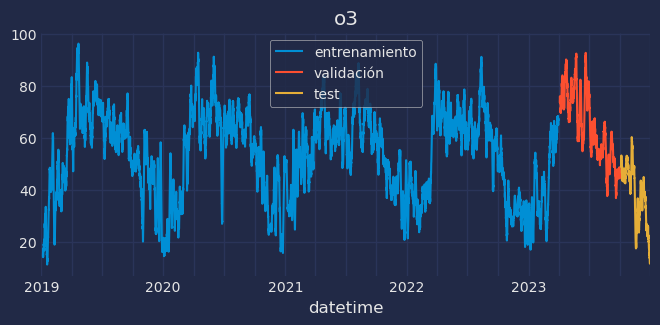

In [9]:
# Gráfico de la serie temporal del contaminante ozono
# ==============================================================================
set_dark_theme()
fig, ax = plt.subplots(figsize=(7, 3))
air_quality_train["o3"].rolling(100).mean().plot(ax=ax, label="entrenamiento")
air_quality_val["o3"].rolling(100).mean().plot(ax=ax, label="validación")
air_quality_test["o3"].rolling(100).mean().plot(ax=ax, label="test")
ax.set_title("o3")
ax.legend();

## Modelo LSTM y ForecasterRnn

Si bien tensorflow-keras facilita el proceso de crear arquitecturas de deep learning, no siempre es trivial determinar las dimensiones que debe tener un modelo LSTM para forecasting ya que estas dependen de cuantas series temporales se estén modelando, cuantas prediciendo y la longitud del horicento de predicción.

Para tratar de mejorar la experiencia del usuario y acelerar el proceso de propotipado, desarollo y puesta en producción, skforecast dispone de la función create_and_compile_model, con la que, indicando apenas unos pocos argumentos, se infiere la arquitectura y se crea el modelo.

`series:` Series temporales que se utilizarán para entrenar el modelo

`levels:` Series temporales que se quieren predecir

`lags:` Número de pasos de tiempo que se utilizarán para predecir el siguiente valor.

`steps:` Número de pasos de tiempo que se quieren predecir.

`recurrent_layer:` Tipo de capa recurrente a utilizar. Por defecto, se utiliza una capa LSTM.

`recurrent_units:` Número de unidades de la capa recurrente. Por defecto, se utiliza 100. Si se pasa una lista, se creará una capa recurrente por cada elemento de la lista.

`dense_units:` Número de unidades de la capa densa. Por defecto, se utiliza 64. Si se pasa una lista, se creará una capa densa por cada elemento de la lista.

`optimizer:` Optimizador a utilizar. Por defecto, se utiliza Adam con learning rate de 0.01.

`loss:` Función de pérdida a utilizar. Por defecto, se utiliza Mean Squared Error.

Una vez que el modelo se ha creado y compilado, el siguiente paso es crear una instancia del ForecasterRnn. Esta clase se encarga de añadir al modelo de deep learning todas las funcionalidades necesarias para que pueda utilizarse en problemas de forecasting. Además es compatible con el resto de funcionalidades que ofrece skforecast (backtesting, busqueda de hiperparámetros, ...).

### Problema 1:1 - Modelar una única serie
En este priemr escenario, se desea predecir la concentracion de  O3
de los próximos 1 y 5 días utilizando únciamente sus propios datos históricos. Se trata por lo tanto de un escenario en el que una única serie temporal se modela utilizando únicamente sus valores pasados. Este problema también se denomina predicción autoregresiva.

#### Predicción de un día a futuro (Single step forecasting)
En primer lugar, se realiza un pronóstico de un solo paso a futuro. Par ello, se creará un modelo utilizando la función create_and_compile_model, que se pasa como argumento a la clase ForecasterRnn.

Este es el ejemplo más sencillo de forecasting con redes neuronales recurrentes. El modelo solo necesita una serie temporal para entrenar y predecir. Por lo tanto, el argumento series de la función create_and_compile_model solo necesita una serie temporal, la mismo que se quiere predecir (levels). Además, como solo se quiere predecir un único valor a futuro, el argumento steps es igual a 1.

In [10]:
# Creación del modelo
# ==============================================================================
series = ["o3"]  # Series temporales que se utilizarán para entrenar el modelo.
levels = ["o3"]  # Serie que se quiere predecir
lags = 32        # Valores pasados a utilizar en la predicción
steps = 1        # Pasos a futuro a predecir

# Selección de las series temporales utilizadas
data = air_quality[series].copy()
data_train = air_quality_train[series].copy()
data_val = air_quality_val[series].copy()
data_test = air_quality_test[series].copy()

model = create_and_compile_model(
    series=data_train,
    levels=levels, 
    lags=lags,
    steps=steps,
    recurrent_layer="LSTM",
    recurrent_units=4,
    dense_units=16,
    optimizer=Adam(learning_rate=0.01), 
    loss=MeanSquaredError()
)
model.summary()

keras version: 3.6.0
Using backend: tensorflow
tensorflow version: 2.18.0


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 4)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Se utilizará un modelo sencillo, una red LSTM con una única capa recurrente con 4 neuronas y una capa oculta densa de 16 neuronas. La siguiente tabla muestra una descripción detallada de cada capa:

# Estructura del Modelo LSTM

| **Capa**                        | **Tipo**        | **Forma de salida** | **Parámetros** | **Descripción**                                                                                                                                                                                                 |
|---------------------------------|----------------|---------------------|----------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Capa de Entrada (InputLayer)** | InputLayer     | (None, 32, 1)      | 0              | Esta es la capa de entrada del modelo. Recibe secuencias de longitud 32, correspondiente al número de lags con una dimensión en cada paso de tiempo.                                                         |
| **Capa LSTM (Long Short-Term Memory)** | LSTM          | (None, 4)          | 96             | La capa LSTM es una capa de memoria a corto y largo plazo que procesa la secuencia de entrada. Tiene 4 unidades LSTM y se conecta a la capa siguiente.                                                      |
| **Primera Capa Densa (Dense)**   | Dense          | (None, 16)         | 80             | Esta es una capa completamente conectada con 16 unidades y utiliza una función de activación por defecto (relu) en la arquitectura proporcionada.                                                           |
| **Segunda Capa Densa (Dense)**   | Dense          | (None, 1)          | 17             | Otra capa densa completamente conectada, esta vez con una sola unidad de salida. También utiliza una función de activación por defecto.                                                                      |
| **Capa de Remodelación (Reshape)** | Reshape        | (None, 1, 1)       | 0              | Esta capa remodela la salida de la capa densa anterior para tener una forma específica `(None, 1, 1)`. Esta capa no es estrictamente necesaria, pero se incluye para que el módulo sea generalizable a otros problemas de forecasting multi-output. La dimensión de esta capa es calculada como `(pasos_a_futuro_a_predecir, series_a_predecir)`. En este caso se tiene `steps=1` y `levels=03`, por lo que la dimensión es `(None, 1, 1)`. |
| **Total de Parámetros y Entrenables** | -             | -                   | **193**        | Total de Parámetros: 193, Parámetros Entrenables: 193, Parámetros No Entrenables: 0                                                                                                                         |


Una vez que el modelo se ha creado y compilado, el siguiente paso es crear una instancia del ForecasterRnn. Esta clase se encarga de añadir al modelo de regresión todas las funcionalidades necesarias para que pueda utilizarse en problemas de forecasting. Además es compatible con el resto de funcionalidades que ofrece skforecast.

El forecaster se crea a partir del modelo y se le pasan los datos de validación para que pueda evaluar el modelo en cada época. Además, se le pasa un objeto MinMaxScaler para que estandarice los datos de entrada y salida. Este objeto se encargará de escalar los datos de entrada y de desescalar las predicciones.

Por otro lado, los fit_kwargs son los argumentos que se le pasan al método fit del modelo. En este caso, se le pasa el número de épocas, el tamaño del batch, los datos de validación y un callback para detener el entrenamiento cuando la pérdida de validación deje de disminuir.

In [11]:
# Creación del forecaster
# ==============================================================================
forecaster = ForecasterRnn(
    regressor=model,
    levels=levels,
    transformer_series=MinMaxScaler(),
    fit_kwargs={
        "epochs": 10,      # Número de épocas para entrenar el modelo.
        "batch_size": 32,  # Tamaño del batch para entrenar el modelo.
        "callbacks": [
            EarlyStopping(monitor="val_loss", patience=5)
        ],  # Callback para detener el entrenamiento cuando ya no esté aprendiendo más.
        "series_val": data_val,  # Datos de validación para el entrenamiento del modelo.
    },
)
forecaster

c:\Users\wsand\anaconda3\Lib\site-packages\skforecast\deep_learning\_forecaster_rnn.py:229: UserWarning:

Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.

c:\Users\wsand\anaconda3\Lib\site-packages\skforecast\deep_learning\_forecaster_rnn.py:264: UserWarning:

`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.



ForecasterRnn 
Regressor: <Functional name=functional, built=True> 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32] 
Transformer for series: MinMaxScaler() 
Window size: 32 
Target series, levels: ['o3'] 
Multivariate series (names): None 
Maximum steps predicted: [1] 
Training range: None 
Training index type: None 
Training index frequency: None 
Model parameters: {'name': 'functional', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 32, 1), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}, 'registered_name': None, 'name': 'input_layer', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'LSTM', 'config': {'name': 'lstm', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful':

El warning indica que el número de lags se ha inferido de la arquitectura del modelo. En este caso, el modelo tiene una capa LSTM con 32 neuronas, por lo que el número de lags es 32. Si se desea utilizar un número diferente de lags, se puede especificar el argumento lags en la función create_and_compile_model. Para omitir el warning, se puede especificar el argumento lags=lags y steps=steps en la inicialización del ForecasterRnn.

In [12]:
# Entrenamiento del forecaster
# ==============================================================================
forecaster.fit(data_train)

Epoch 1/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0158 - val_loss: 0.0049
Epoch 2/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0056 - val_loss: 0.0048
Epoch 3/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0055 - val_loss: 0.0046
Epoch 4/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0051 - val_loss: 0.0046
Epoch 5/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0051 - val_loss: 0.0045
Epoch 6/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0051 - val_loss: 0.0043
Epoch 7/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0051 - val_loss: 0.0044
Epoch 8/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0049 - val_loss: 0.0053
Epoch 9/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 10/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0051 - val_loss: 0.0049


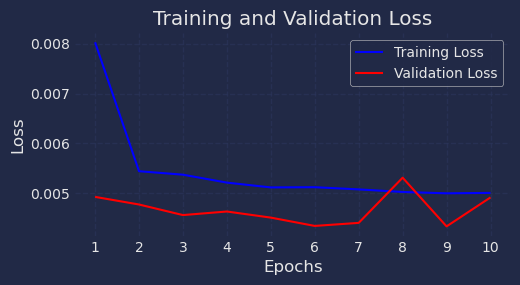

In [13]:
# Seguimiento del entrenamiento y overfitting
# ==============================================================================
fig, ax = plt.subplots(figsize=(5, 2.5))
forecaster.plot_history(ax=ax)

En los modelos de deep learning es muy importante controlar el overfitting. Para ello, se utiliza un callback de Keras que detiene el entrenamiento cuando el valor de la función de coste, en los datos de validación, deja de disminuir. En este caso, el callback no llega a detener el entrenamiento, ya que únicamente hemos entrenado con 10 épocas. Si se aumenta el número de épocas, el callback detendrá el entrenamiento cuando la pérdida de validación deje de disminuir.

Por otro lado, otra herramienta muy util es el graficado de la pérdida de entrenamiento y validación en cada época. Esto permite visualizar el comportamiento del modelo y detectar posibles problemas de overfitting.

En el caso de nuestro modelo, se observa que la pérdida de entrenamiento disminuye rápidamente en las primera época, mientras que la pérdida de validación es baja desde la primera época. De esto se deduce lo siguiente:

- El modelo no está haciendo overfitting, ya que la pérdida de validación es similar a la de entrenamiento.

- El error de validación se calcula una vez se entrena el modelo, por ello el primer valor de la pérdida de validación en la primera época es parecido al de la pérdida de entrenamiento en la segunda época.

In [14]:
# Predicción
# ==============================================================================
predictions = forecaster.predict()
predictions

,o3
2023-03-31,53.375546


Para obtener una estimación robusta de la capacidad predictiva del modelo, se realiza un proceso de backtesting. El proceso de backtesting consiste en generar una predicción para cada observación del conjunto de test, siguiendo el mismo procedimiento que se seguiría si el modelo estuviese en producción, y finalmente comparar el valor predicho con el valor real.

In [15]:
# Backtesting con datos de test
# ==============================================================================
cv = TimeSeriesFold(
    steps=forecaster.max_step,
    initial_train_size=len(data.loc[:end_validation, :]), # Datos de entrenamiento + validación
    refit=False,
)
metrics, predictions = backtesting_forecaster_multiseries(
    forecaster=forecaster,
    series=data,
    levels=forecaster.levels,
    cv=cv,
    metric="mean_absolute_error",
    verbose=False,
)

Epoch 1/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 2/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 3/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 4/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 5/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0043 - val_loss: 0.0045
Epoch 6/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0042 - val_loss: 0.0043


  0%|          | 0/2208 [00:00<?, ?it/s]

In [16]:
# Predicciones de backtesting
# ==============================================================================
predictions

,o3
2023-10-01 00:00:00,8.583232
2023-10-01 01:00:00,21.754128
2023-10-01 02:00:00,31.236168
2023-10-01 03:00:00,26.527704
2023-10-01 04:00:00,28.962576
...,...
2023-12-31 19:00:00,44.443539
2023-12-31 20:00:00,41.487766
2023-12-31 21:00:00,44.532154
2023-12-31 22:00:00,51.095978


In [17]:
# Gráfico de las predicciones vs valores reales en el conjunto de test
# ==============================================================================
fig = go.Figure()
trace1 = go.Scatter(x=data_test.index, y=data_test['o3'], name="test", mode="lines")
trace2 = go.Scatter(x=predictions.index, y=predictions['o3'], name="predicciones", mode="lines")
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    title="Predicciones vs valores reales en el conjunto de test",
    xaxis_title="Date time",
    yaxis_title="O3",
    width=750,
    height=350,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.05,
        xanchor="left",
        x=0
    )
)
fig.show()

In [18]:
# Métricas de backtesting
# ==============================================================================
metrics

,levels,mean_absolute_error
0,o3,5.762955


In [19]:
# Error en % respecto a la media de la serie
# ==============================================================================
rel_mse = 100 * metrics.loc[0, 'mean_absolute_error'] / np.mean(data["o3"])
print(f"Media de la serie: {np.mean(data['o3']):0.2f}")
print(f"Error (mae) relativo: {rel_mse:0.2f} %")

Media de la serie: 53.67
Error (mae) relativo: 10.74 %


## Multi-step forecasting

En este caso, se desea predecir los próximos 5 valores de O3 utilizando únicamente sus datos históricos. Se trata por lo tanto de un escenario en el que múltiples pasos a futuro de una única serie temporal se modela utilizando únicamente sus valores pasados.

Para ello se utilizará una arquitectura similar a la anterior, pero con un mayor número de neuronas en la capa LSTM y en la primera capa densa. Esto permitirá al modelo tener mayor flexibilidad para modelar la serie temporal.

In [20]:
# Creación del modelo
# ==============================================================================
series = ["o3"]  # Series temporales que se utilizarán para entrenar el modelo. 
levels = ["o3"]  # Serie que se quiere predecir
lags = 32        # Valores pasados a utilizar en la predicción
steps = 5        # Pasos a futuro a predecir

model = create_and_compile_model(
    series=data_train,
    levels=levels, 
    lags=lags,
    steps=steps,
    recurrent_layer="LSTM",
    recurrent_units=50,
    dense_units=32,
    optimizer=Adam(learning_rate=0.01), 
    loss=MeanSquaredError()
)
model.summary()

keras version: 3.6.0
Using backend: tensorflow
tensorflow version: 2.18.0


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 5, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,197 (47.64 KB)

 Trainable params: 12,197 (47.64 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Creación del Forecaster
# ==============================================================================
forecaster = ForecasterRnn(
    regressor=model,
    levels=levels,
    steps=steps,
    lags=lags,
    transformer_series=MinMaxScaler(),
    fit_kwargs={
        "epochs": 10,      # Número de épocas para entrenar el modelo.
        "batch_size": 32,  # Tamaño del batch para entrenar el modelo.
        "callbacks": [
            EarlyStopping(monitor="val_loss", patience=5)
        ],  # Callback para detener el entrenamiento cuando ya no esté aprendiendo más.
        "series_val": data_val,  # Datos de validación para el entrenamiento del modelo.
    },
)

✎ Nota

El parámetro `fit_kwargs` es de gran utilidad ya que permite establecer cualquier configuración en el modelo, en este caso de Keras. En el código anterior se define el número de épocas de entrenamiento (10) con un batch size de 32. Se configura un callback de `EarlyStopping` que detiene el entrenamiento cuando la pérdida de validación deja de disminuir durante 5 épocas (`patience=5`). También se pueden cofigurar otros callbacks como `ModelCheckpoint` para guardar el modelo en cada época, o incluso Tensorboard para visualizar la pérdida de entrenamiento y validación en tiempo real.

In [22]:
# Entrenamiento del forecaster
# ==============================================================================
forecaster.fit(data_train)

Epoch 1/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0253 - val_loss: 0.0114
Epoch 2/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0129 - val_loss: 0.0099
Epoch 3/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0120 - val_loss: 0.0099
Epoch 4/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0115 - val_loss: 0.0093
Epoch 5/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0114 - val_loss: 0.0094
Epoch 6/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0112 - val_loss: 0.0087
Epoch 7/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0111 - val_loss: 0.0088
Epoch 8/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0109 - val_loss: 0.0092
Epoch 9/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0108 - val_loss: 0.0087
Epoch 10/10
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0108 - val_loss: 0.0088


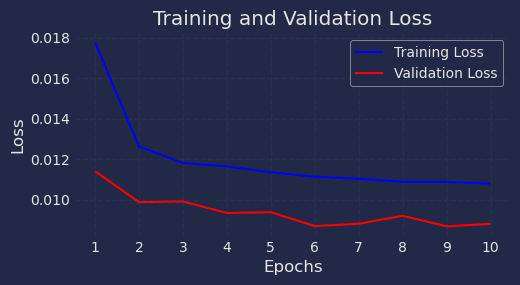

In [23]:
# Seguimiento del entrenamiento y overfitting
# ==============================================================================
fig, ax = plt.subplots(figsize=(5, 2.5))
forecaster.plot_history(ax=ax)

Se realiza la predicción. En este caso son 5 valores ya que se ha especificado 5 pasos a futuro (step).

In [24]:
# Predicción
# ==============================================================================
predictions = forecaster.predict()
predictions

,o3
2023-03-31 00:00:00,53.290276
2023-03-31 01:00:00,52.145363
2023-03-31 02:00:00,49.138428
2023-03-31 03:00:00,44.136280
2023-03-31 04:00:00,40.554455


También se pueden predecir steps especificos, siempre y cuando se encuentren dentro del horizonte de predicción definido en el modelo.

In [25]:
# Predicción steps especificos
# ==============================================================================
predictions = forecaster.predict(steps=[1, 3])
predictions

,o3
2023-03-31 00:00:00,53.290276
2023-03-31 02:00:00,49.138428


In [26]:
# Backtesting con datos de test
# ==============================================================================
cv = TimeSeriesFold(
    steps=forecaster.max_step,
    initial_train_size=len(data.loc[:end_validation, :]), # Datos de entrenamiento + validación
    refit=False,
)

metrics, predictions = backtesting_forecaster_multiseries(
    forecaster=forecaster,
    series=data,
    levels=forecaster.levels,
    cv=cv,
    metric="mean_absolute_error",
    verbose=False,
)

Epoch 1/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0094 - val_loss: 0.0101
Epoch 2/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0092 - val_loss: 0.0094
Epoch 3/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0092 - val_loss: 0.0089
Epoch 4/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 5/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0092 - val_loss: 0.0091


  0%|          | 0/442 [00:00<?, ?it/s]

In [27]:
# Predicciones de backtesting
# ==============================================================================
predictions

,o3
2023-10-01 00:00:00,10.281453
2023-10-01 01:00:00,13.863817
2023-10-01 02:00:00,15.808475
2023-10-01 03:00:00,17.052483
2023-10-01 04:00:00,17.433163
...,...
2023-12-31 19:00:00,40.198647
2023-12-31 20:00:00,38.191067
2023-12-31 21:00:00,41.957825
2023-12-31 22:00:00,38.139893


In [28]:
# Gráfico de las predicciones vs valores reales en el conjunto de test
# ==============================================================================
fig = go.Figure()
trace1 = go.Scatter(x=data_test.index, y=data_test['o3'], name="test", mode="lines")
trace2 = go.Scatter(x=predictions.index, y=predictions['o3'], name="predicciones", mode="lines")
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    title="Predicciones vs valores reales en el conjunto de test",
    xaxis_title="Date time",
    yaxis_title="O3",
    width=750,
    height=350,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.05,
        xanchor="left",
        x=0
    )
)
fig.show()

In [29]:
# Métricas de backtesting
# ==============================================================================
metrics

,levels,mean_absolute_error
0,o3,9.034337


In [30]:
# Error mse en % respecto a la media de la serie
# ==============================================================================
rel_mse = 100 * metrics.loc[0, 'mean_absolute_error'] / np.mean(data["o3"])
print(f"Media de la serie: {np.mean(data['o3']):0.2f}")
print(f"Error mse relativo: {rel_mse:0.2f} %")

Media de la serie: 53.67
Error mse relativo: 16.83 %


## Problemas N:1 - Series temporales múltiples con salida única¶

En este caso se tratará de predecir la misma serie temporal, pero utilizando múltiples series temporales como predictores. Se trata, por lo tanto, de un escenario en el que valores pasados de múltiples series temporales se utilizan predecir una única serie temporal.

Este tipo de aproximaciones son muy útiles cuando se dispone de múltiples series temporales relacionadas entre sí. Por ejemplo, en el caso de la predicción de la temperatura, se pueden utilizar múltiples series temporales como la humedad, la presión atmosférica, la velocidad del viento, etc.

En este tipo de problemas, la arquitectura de la red neuronal es más compleja, se necesita una capa densa recurrente adicional para procesar las múltiples series de entrada. Además, se añade otra capa oculta densa para procesar la salida de la capa recurrente. Como se puede observar, la creación del modelo utilizando skforecast es muy sencilla, simplemente basta con pasar una lista de enteros al arguento recurrent_units y dense_units para crear múltiples capas recurrentes y densas.

In [31]:
# Creación del modelo
# ==============================================================================
# Series temporales utilizadas en el entrenamiento. Tiene que incluir la serie a predecir.
series = ['pm2.5', 'co', 'no', 'no2', 'pm10', 'nox', 'o3', 'veloc.', 'direc.','so2'] 
levels = ["o3"]  # Serie que se quiere predecir
lags = 32        # Valores pasados a utilizar en la predicción
steps = 5        # Pasos a futuro a predecir

# Selección de las series temporales utilizadas
data = air_quality[series].copy()
data_train = air_quality_train[series].copy()
data_val = air_quality_val[series].copy()
data_test = air_quality_test[series].copy()

model = create_and_compile_model(
    series=data_train,
    levels=levels, 
    lags=lags,
    steps=steps,
    recurrent_layer="LSTM",
    recurrent_units=[100, 50],
    dense_units=[64, 32],
    optimizer=Adam(learning_rate=0.01), 
    loss=MeanSquaredError()
)
model.summary()


keras version: 3.6.0
Using backend: tensorflow
tensorflow version: 2.18.0


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32, 100)        │        44,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 5, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,109 (312.93 KB)

 Trainable params: 80,109 (312.93 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Creación del Forecaster
# ==============================================================================
forecaster = ForecasterRnn(
    regressor=model,
    levels=levels,
    steps=steps,
    lags=lags,
    transformer_series=MinMaxScaler(),
    fit_kwargs={
        "epochs": 4,             # Número de épocas para entrenar el modelo.
        "batch_size": 128,       # Tamaño del batch para entrenar el modelo.
        "series_val": data_val,  # Datos de validación para el entrenamiento del modelo.
    },
)
forecaster

ForecasterRnn 
Regressor: <Functional name=functional_2, built=True> 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32] 
Transformer for series: MinMaxScaler() 
Window size: 32 
Target series, levels: ['o3'] 
Multivariate series (names): None 
Maximum steps predicted: [1 2 3 4 5] 
Training range: None 
Training index type: None 
Training index frequency: None 
Model parameters: {'name': 'functional_2', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 32, 10), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_2'}, 'registered_name': None, 'name': 'input_layer_2', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'LSTM', 'config': {'name': 'lstm_2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': True, 'return_state': False, 'go_backwards': 

In [33]:
# Entrenamiento del Modelo
# ==============================================================================
forecaster.fit(data_train)

Epoch 1/4
291/291 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - loss: 0.0758 - val_loss: 0.0124
Epoch 2/4
291/291 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - loss: 0.0115 - val_loss: 0.0104
Epoch 3/4
291/291 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 0.0106 - val_loss: 0.0093
Epoch 4/4
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - loss: 0.0102 - val_loss: 0.0096


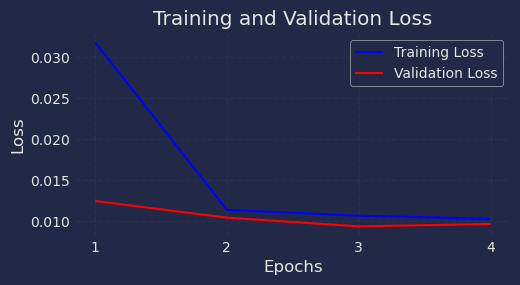

In [34]:
# Seguimiento del entrenamiento y overfitting
# ==============================================================================
fig, ax = plt.subplots(figsize=(5, 2.5))
forecaster.plot_history(ax=ax)

In [35]:
# Predicción
# ==============================================================================
predictions = forecaster.predict()
predictions

,o3
2023-03-31 00:00:00,58.138958
2023-03-31 01:00:00,55.025150
2023-03-31 02:00:00,49.663040
2023-03-31 03:00:00,42.398281
2023-03-31 04:00:00,39.813423


In [36]:
# Backtesting con datos de test
# ==============================================================================
cv = TimeSeriesFold(
        steps=forecaster.max_step,
        initial_train_size=len(data.loc[:end_validation, :]), # Datos de entrenamiento + validación
        refit=False,
)
metrics, predictions = backtesting_forecaster_multiseries(
    forecaster=forecaster,
    series=data,
    levels=forecaster.levels,
    cv=cv,
    metric="mean_absolute_error",
    verbose=False,
)

Epoch 1/4
325/325 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - loss: 0.0089 - val_loss: 0.0102
Epoch 2/4
325/325 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0086 - val_loss: 0.0091
Epoch 3/4
325/325 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - loss: 0.0083 - val_loss: 0.0088
Epoch 4/4
325/325 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0084 - val_loss: 0.0095


  0%|          | 0/442 [00:00<?, ?it/s]

In [37]:
# Métricas de error de backtesting
# ==============================================================================
metrics

,levels,mean_absolute_error
0,o3,12.08568


In [38]:
# Error mse en % respecto a la media de la serie
# ==============================================================================
rel_mse = 100 * metrics.loc[0, 'mean_absolute_error'] / np.mean(data["o3"])
print(f"Media de la serie: {np.mean(data['o3']):0.2f}")
print(f"Error mse relativo: {rel_mse:0.2f} %")

Media de la serie: 53.67
Error mse relativo: 22.52 %


In [39]:
# Predicciones de backtesting
# ==============================================================================
predictions

,o3
2023-10-01 00:00:00,5.706049
2023-10-01 01:00:00,10.556127
2023-10-01 02:00:00,11.728074
2023-10-01 03:00:00,15.896840
2023-10-01 04:00:00,17.195650
...,...
2023-12-31 19:00:00,38.670731
2023-12-31 20:00:00,35.094090
2023-12-31 21:00:00,43.276310
2023-12-31 22:00:00,41.051331


In [40]:
# Gráfico de las predicciones vs valores reales en el conjunto de test
# ==============================================================================
fig = go.Figure()
trace1 = go.Scatter(x=data_test.index, y=data_test['o3'], name="test", mode="lines")
trace2 = go.Scatter(x=predictions.index, y=predictions['o3'], name="predicciones", mode="lines")
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    title="Predicciones vs valores reales en el conjunto de test",
    xaxis_title="Date time",
    yaxis_title="O3",
    width=750,
    height=350,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.05,
        xanchor="left",
        x=0
    )
)
fig.show()

## Problemas N:M - Series temporales múltiples con salidas múltiples

El siguiente , consiste en predecir múltiples series temporales utilizando múltiples series temporales como predictores. Se trata, por lo tanto, de un escenario en el que se modelan múltiples series simultaneamente utilizando un único modelo. Esto tiene especial aplicación en muchos escenarios reales, como por ejemplo, la predicción de valores en bolsa de varias empresas en función del histórico de la bolsa, del precio de la energía y materias primas. O el caso del forecasting de múltiples productos en una tienda online, en función de las ventas de otros productos, el precio de los productos, etc.

In [41]:
# Creación del modelo
# ==============================================================================
series = ['pm2.5', 'co', 'no', 'no2', 'pm10', 'nox', 'o3', 'veloc.', 'direc.', 'so2'] 
levels = ['pm2.5', 'co', 'no', "o3"] # Características a predecir. Pueden ser todas las serires o menos
lags = 32 # Valores pasados a utilizar en la predicción
steps = 5 # Pasos a futuro a predecir

data = air_quality[series].copy()
data_train = air_quality_train[series].copy()
data_val = air_quality_val[series].copy()
data_test = air_quality_test[series].copy()

model = create_and_compile_model(
    series=data_train,
    levels=levels, 
    lags=lags,
    steps=steps,
    recurrent_layer="LSTM",
    recurrent_units=[100, 50],
    dense_units=[64, 32],
    optimizer=Adam(learning_rate=0.01), 
    loss=MeanSquaredError()
)
model.summary()

keras version: 3.6.0
Using backend: tensorflow
tensorflow version: 2.18.0


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32, 100)        │        44,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 5, 4)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,604 (314.86 KB)

 Trainable params: 80,604 (314.86 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Creación del forecaster
# ==============================================================================
forecaster = ForecasterRnn(
    regressor=model,
    levels=levels,
    steps=steps,
    lags=lags,
    transformer_series=MinMaxScaler(),
    fit_kwargs={
        "epochs": 100,      # Número de épocas para entrenar el modelo.
        "batch_size": 128,  # Tamaño del batch para entrenar el modelo.
        "callbacks": [
            EarlyStopping(monitor="val_loss", patience=5)
        ],  # Callback para detener el entrenamiento cuando ya no esté aprendiendo más.
        "series_val": data_val,  # Datos de validación para el entrenamiento del modelo.
    },
)
forecaster

ForecasterRnn 
Regressor: <Functional name=functional_3, built=True> 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32] 
Transformer for series: MinMaxScaler() 
Window size: 32 
Target series, levels: ['pm2.5', 'co', 'no', 'o3'] 
Multivariate series (names): None 
Maximum steps predicted: [1 2 3 4 5] 
Training range: None 
Training index type: None 
Training index frequency: None 
Model parameters: {'name': 'functional_3', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 32, 10), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_3'}, 'registered_name': None, 'name': 'input_layer_3', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'LSTM', 'config': {'name': 'lstm_4', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': True, 'return_state': Fa

In [43]:
# Entrenamiento del Modelo
# ==============================================================================
forecaster.fit(data_train)

Epoch 1/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - loss: 0.0130 - val_loss: 0.0154
Epoch 2/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - loss: 0.0044 - val_loss: 0.0117
Epoch 3/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.0038 - val_loss: 0.0092
Epoch 4/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 0.0035 - val_loss: 0.0094
Epoch 5/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 0.0034 - val_loss: 0.0090
Epoch 6/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - loss: 0.0033 - val_loss: 0.0095
Epoch 7/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 0.0032 - val_loss: 0.0087
Epoch 8/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0031 - val_loss: 0.0081
Epoch 9/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 0.0030 - val_loss: 0.0086
Epoch 10/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 0.0030 - val_loss: 0.0080
Epoch 11/100
291/291 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - loss: 0.0030 - val_loss: 0.0082
Epoch 12/100
291/29

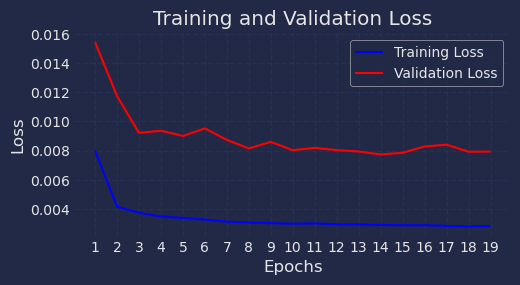

In [44]:
# Seguimiento del entrenamiento y overfitting
# ==============================================================================
fig, ax = plt.subplots(figsize=(5, 2.5))
forecaster.plot_history(ax=ax)

In [45]:
# Predicción
# ==============================================================================
predictions = forecaster.predict()
predictions

,pm2.5,co,no,o3
2023-03-31 00:00:00,7.486657,0.136269,2.199405,63.955379
2023-03-31 01:00:00,7.240629,0.130770,1.917452,66.088409
2023-03-31 02:00:00,7.249692,0.127433,1.732306,63.255508
2023-03-31 03:00:00,7.000741,0.125515,1.286377,62.681633
2023-03-31 04:00:00,6.629253,0.124345,0.309664,62.174183


In [46]:
# Backtesting con datos de test
# ==============================================================================
cv = TimeSeriesFold(
        steps=forecaster.max_step,
        initial_train_size=len(data.loc[:end_validation, :]), # Datos de entrenamiento + validación
        refit=False,
)
metrics, predictions = backtesting_forecaster_multiseries(
    forecaster=forecaster,
    series=data,
    levels=forecaster.levels,
    cv=cv,
    metric="mean_absolute_error",
    verbose=False,
)

Epoch 1/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - loss: 0.0025 - val_loss: 0.0084
Epoch 2/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0025 - val_loss: 0.0075
Epoch 3/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0025 - val_loss: 0.0080
Epoch 4/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0025 - val_loss: 0.0084
Epoch 5/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0024 - val_loss: 0.0082
Epoch 6/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 0.0025 - val_loss: 0.0083
Epoch 7/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - loss: 0.0024 - val_loss: 0.0082


  0%|          | 0/442 [00:00<?, ?it/s]

In [47]:
# Métricas de error de backtesting
# ==============================================================================
metrics

,levels,mean_absolute_error
0,pm2.5,3.308693
1,co,0.004157
2,no,6.968536
3,o3,12.132432
4,average,5.603454
5,weighted_average,5.603454
6,pooling,5.603454


In [48]:
# Error mse en % respecto a la media de la serie
# ==============================================================================
rel_mse = 100 * metrics.loc[0, 'mean_absolute_error'] / np.mean(data["o3"])
print(f"Media de la serie: {np.mean(data['o3']):0.2f}")
print(f"Error mse relativo: {rel_mse:0.2f} %")

Media de la serie: 53.67
Error mse relativo: 6.16 %


In [49]:
# Predicciones de backtesting
# ==============================================================================
predictions

,pm2.5,co,no,o3
2023-10-01 00:00:00,8.105922,0.106499,4.787057,10.511049
2023-10-01 01:00:00,7.510943,0.101989,2.535769,12.822739
2023-10-01 02:00:00,6.849792,0.099709,1.308441,16.473288
2023-10-01 03:00:00,5.961117,0.099516,0.244510,19.874939
2023-10-01 04:00:00,5.267182,0.096186,-0.505337,21.672974
...,...,...,...,...
2023-12-31 19:00:00,7.794267,0.105127,1.289532,49.319138
2023-12-31 20:00:00,8.031964,0.106008,1.124760,38.782898
2023-12-31 21:00:00,6.093469,0.103256,1.349507,40.303516
2023-12-31 22:00:00,6.487867,0.104261,1.148324,31.641373


In [50]:
# Gráfico de las predicciones vs valores reales en el conjunto de test
# ==============================================================================
fig = go.Figure()
trace1 = go.Scatter(x=data_test.index, y=data_test['o3'], name="test", mode="lines")
trace2 = go.Scatter(x=predictions.index, y=predictions['o3'], name="predicciones", mode="lines")
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    title="Predicciones vs valores reales en el conjunto de test",
    xaxis_title="Date time",
    yaxis_title="O3",
    width=750,
    height=350,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.05,
        xanchor="left",
        x=0
    )
)
fig.show()

In [51]:
# Gráfico de las predicciones vs valores reales en el conjunto de test
# ==============================================================================
fig = go.Figure()
trace1 = go.Scatter(x=data_test.index, y=data_test['pm2.5'], name="test", mode="lines")
trace2 = go.Scatter(x=predictions.index, y=predictions['pm2.5'], name="predicciones", mode="lines")
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    title="Predicciones vs valores reales en el conjunto de test",
    xaxis_title="Date time",
    yaxis_title="pm2.5",
    width=750,
    height=350,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.05,
        xanchor="left",
        x=0
    )
)
fig.show()

In [52]:
# Gráfico de las predicciones vs valores reales en el conjunto de test
# ==============================================================================
fig = go.Figure()
trace1 = go.Scatter(x=data_test.index, y=data_test['co'], name="test", mode="lines")
trace2 = go.Scatter(x=predictions.index, y=predictions['co'], name="predicciones", mode="lines")
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    title="Predicciones vs valores reales en el conjunto de test",
    xaxis_title="Date time",
    yaxis_title="co",
    width=750,
    height=350,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.05,
        xanchor="left",
        x=0
    )
)
fig.show()

In [53]:
# Gráfico de las predicciones vs valores reales en el conjunto de test
# ==============================================================================
fig = go.Figure()
trace1 = go.Scatter(x=data_test.index, y=data_test['no'], name="test", mode="lines")
trace2 = go.Scatter(x=predictions.index, y=predictions['no'], name="predicciones", mode="lines")
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    title="Predicciones vs valores reales en el conjunto de test",
    xaxis_title="Date time",
    yaxis_title="no",
    width=750,
    height=350,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.05,
        xanchor="left",
        x=0
    )
)
fig.show()